# One-Neuron Analysis Using Allen Brain Observatory Dataset

This notebook analyzes calcium imaging data from a single neuron.
We focus on responses to drifting gratings stimulus,
plotting full traces, trial responses, and average response with variability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
import os
import sys
import platform
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

# Detect platform to set data root folder for Allen dataset
platstring = platform.platform()

if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS
    data_root = "/Volumes/TReND2025/"
elif 'Windows' in platstring:
    # Windows (update drive letter if needed)
    data_root = "D:/"
elif ('amzn' in platstring) or ('google.colab' in sys.modules):
    # Running in Amazon Code Ocean or Google Colab
    data_root = "/data/"
elif 'Linux' in platstring:
    # Linux platform (update username as needed)
    data_root = "/media/$USERNAME/TReND2025/"
else:
    
    data_root = '/path/to/data'


manifest_file = os.path.join(data_root, 'allen-brain-observatory/visual-coding-2p/manifest.json')


boc = BrainObservatoryCache(manifest_file=manifest_file)

print("Data root set to:", data_root)
print("Manifest file:", manifest_file)
print("BrainObservatoryCache initialized successfully.")


Data root set to: D:/
Manifest file: D:/allen-brain-observatory/visual-coding-2p/manifest.json
BrainObservatoryCache initialized successfully.


In [57]:
import pandas as pd


experiments_df = pd.DataFrame(experiments)

print(f"Number of experiments: {len(experiments_df)}")
experiments_df.head()


Number of experiments: 1368


,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,566752133,175,VISl,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),116,564425775,three_session_C2,283147,Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147,True
1,653123586,275,VISl,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),111,653123584,three_session_C2,352471,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-352471,True
2,577225417,275,VISl,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),105,575772104,three_session_C2,296710,Vip-IRES-Cre;Ai148-296710,False
3,556353209,375,VISam,Rbp4-Cre_KL100,Ai93(TITL-GCaMP6f),101,555327033,three_session_A,271750,Rbp4-Cre;Camk2a-tTA;Ai93-271750,True
4,510390912,275,VISal,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),80,511500480,three_session_A,232623,Rorb-IRES2-Cre;Camk2a-tTA;Ai93-232623,False


In [59]:
selected_cols = ["id", "targeted_structure", "imaging_depth", "cre_line", "reporter_line", "session_type"]
experiments_df[selected_cols].head()


,id,targeted_structure,imaging_depth,cre_line,reporter_line,session_type
0,566752133,VISl,175,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),three_session_C2
1,653123586,VISl,275,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),three_session_C2
2,577225417,VISl,275,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),three_session_C2
3,556353209,VISam,375,Rbp4-Cre_KL100,Ai93(TITL-GCaMP6f),three_session_A
4,510390912,VISal,275,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),three_session_A


In [61]:
print(experiments_df['targeted_structure'].unique())


['VISl' 'VISam' 'VISal' 'VISp' 'VISpm' 'VISrl']


In [63]:
print(experiments_df['imaging_depth'].unique())


[175 275 375 265 400 250 350 550 200 570 335 625 390 325 300 205 276 225
 185 285 365 320 195]


In [65]:
print(experiments_df['cre_line'].unique())


['Emx1-IRES-Cre' 'Rorb-IRES2-Cre' 'Vip-IRES-Cre' 'Rbp4-Cre_KL100'
 'Slc17a7-IRES2-Cre' 'Cux2-CreERT2' 'Tlx3-Cre_PL56' 'Fezf2-CreER'
 'Pvalb-IRES-Cre' 'Sst-IRES-Cre' 'Ntsr1-Cre_GN220' 'Nr5a1-Cre'
 'Scnn1a-Tg3-Cre']


In [67]:
experiments_df['session_type'].unique()


array(['three_session_C2', 'three_session_A', 'three_session_B',
       'three_session_C'], dtype=object)

In [69]:
# Filter: VISp region, depth 275 µm, three_session_A
filtered_experiments = experiments_df[
    (experiments_df["targeted_structure"] == "VISp") &
    (experiments_df["imaging_depth"] == 275) &
    (experiments_df["session_type"] == "three_session_A")
]

print(f"Total filtered experiments: {len(filtered_experiments)}")
filtered_experiments[selected_cols].head()

Total filtered experiments: 49


,id,targeted_structure,imaging_depth,cre_line,reporter_line,session_type
18,663479824,VISp,275,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),three_session_A
57,510214538,VISp,275,Rorb-IRES2-Cre,Ai93(TITL-GCaMP6f),three_session_A
136,662361096,VISp,275,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),three_session_A
163,528402271,VISp,275,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),three_session_A
182,581150104,VISp,275,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),three_session_A


In [71]:
import matplotlib.pyplot as plt

experiment_id = filtered_experiments.iloc[0]['id']
print(f"Loading data for experiment ID: {experiment_id}")
data_set = boc.get_ophys_experiment_data(experiment_id)
data_set


Loading data for experiment ID: 663479824


In [75]:

cell_ids = data_set.get_cell_specimen_ids()

cell_id = cell_ids[0]


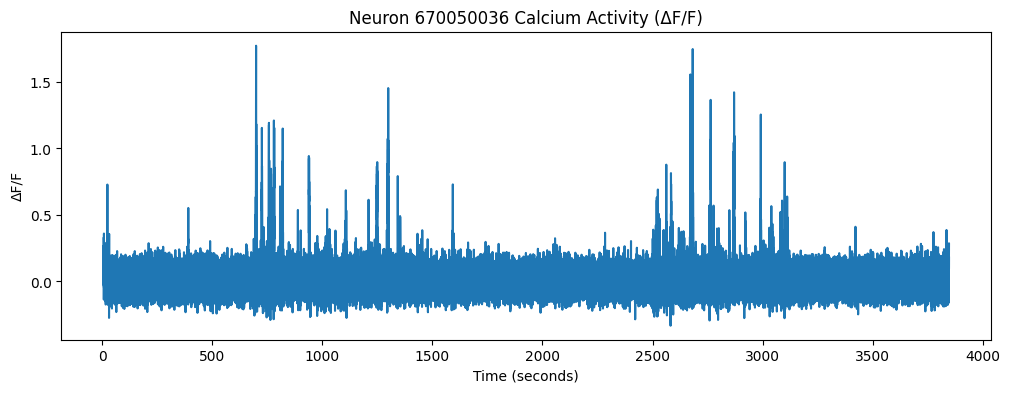

In [77]:
times, dff = data_set.get_dff_traces(cell_specimen_ids=[cell_id])
trace = dff[0]

os.makedirs('results', exist_ok=True)


plt.figure(figsize=(12, 4))
plt.plot(times, trace)
plt.title(f"Neuron {cell_id} Calcium Activity (ΔF/F)")
plt.xlabel("Time (seconds)")
plt.ylabel("ΔF/F")


plt.savefig(f'results/neuron_{cell_id}_calcium_activity.png')


plt.show()

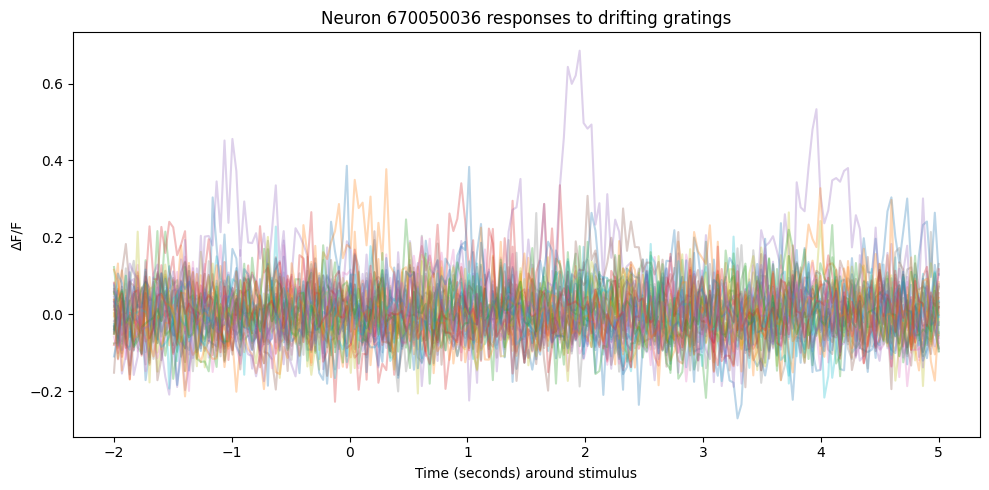

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Get stimulus start times for drifting gratings
stim_starts = data_set.get_stimulus_table('drifting_gratings')['start'].values

# 2. Get neuron ΔF/F trace and timestamps
times, dff = data_set.get_dff_traces(cell_specimen_ids=[cell_id])
trace = dff[0]

# 3. Define window before and after stimulus (seconds)
before = 2  # seconds before stimulus onset
after = 5   # seconds after stimulus onset

# 4. Calculate sampling rate (data points per second)
rate = 1 / np.median(np.diff(times))

# 5. Calculate window size in data points
window_size = int((before + after) * rate)

# 6. Extract aligned snippets of activity around each stimulus
aligned = []
for start in stim_starts:
    idx = np.searchsorted(times, start)
    start_idx = idx - int(before * rate)
    end_idx = start_idx + window_size
    if start_idx < 0 or end_idx > len(trace):
        continue
    aligned.append(trace[start_idx:end_idx])

aligned = np.array(aligned)

# 7. Plot all trial responses overlaid
plt.figure(figsize=(10, 5))
time_window = np.linspace(-before, after, window_size)
for resp in aligned:
    plt.plot(time_window, resp, alpha=0.3)

plt.xlabel("Time (seconds) around stimulus")
plt.ylabel("ΔF/F")
plt.title(f"Neuron {cell_id} responses to drifting gratings")
plt.tight_layout()

# 8. Save plot
os.makedirs('results', exist_ok=True)
plt.savefig(f'results/neuron_{cell_id}_trial_responses.png')

plt.show()


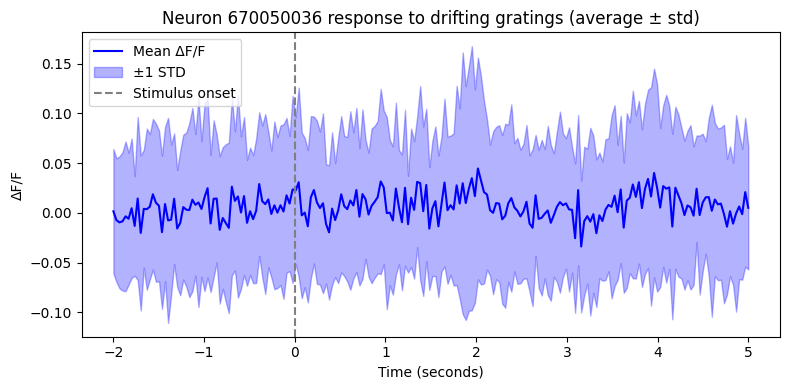

In [81]:
# Assuming 'aligned' is your (trials x timepoints) array from previous code
# aligned.shape should be (num_trials, window_size)

time = np.linspace(-before, after, aligned.shape[1])  # time axis from -2 to +5 seconds

mean_response = np.mean(aligned, axis=0)
std_response = np.std(aligned, axis=0)

plt.figure(figsize=(8,4))
plt.plot(time, mean_response, color='blue', label='Mean ΔF/F')
plt.fill_between(time, mean_response - std_response, mean_response + std_response,
                 color='blue', alpha=0.3, label='±1 STD')
plt.axvline(0, color='gray', linestyle='--', label='Stimulus onset')
plt.xlabel('Time (seconds)')
plt.ylabel('ΔF/F')
plt.title(f'Neuron {cell_id} response to drifting gratings (average ± std)')
plt.legend()
plt.tight_layout()

os.makedirs('results', exist_ok=True)
plt.savefig(f'results/neuron_{cell_id}_avg_response.png')

plt.show()
